In [1]:
from robupy.get_worst_case import get_worst_case_probs, criterion_full
from robupy.minimize_scalar import fminbound_numba
import numpy as np
import numba

import matplotlib.pyplot as plt
from robupy.config import EPS_FLOAT
from robupy.config import MAX_FLOAT
%load_ext autoreload
%autoreload

In [2]:
n_points = 5
max_x = 4
v = np.arange(0, max_x, max_x / n_points)
v_max = np.max(v)
q = np.full(n_points, 1 / n_points)
beta = 0.05

In [7]:
%timeit -n10000 get_worst_case_probs(v, q, beta, is_cost=False)

8.87 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
x = np.linspace(0.5,10, 100)

In [8]:
rstl = []
for i in x:
    rstl += [criterion_full(i, v, v_max, q, beta)]

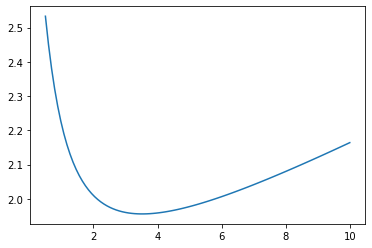

In [9]:
plt.plot(x, rstl)

In [14]:
@numba.jit(nopython=True)
def bisect(func, lower, upper, args=(), xatol=1e-1, maxfun=500):
    k = 0
    a = x_old = lower
    b = x_new = upper
    while (abs(x_new - x_old) > xatol) & (k < maxfun):
        x_old = x_new
        x_new = (a + b) / 2
        sign = func(x_new + 1e-6, *args) - func(x_new, *args)
        if sign < 0:
            a = x_new
        else:
            b = x_new
        k = k + 1
    return x_new, k

In [15]:
upper = np.maximum((v_max - np.dot(q, v)) / beta, 2 * EPS_FLOAT)
lower = EPS_FLOAT

In [18]:
%timeit -n100 fminbound_numba(criterion_full, lower, upper, args=(v, v_max, q, beta), xatol=1e-5)

20 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%timeit -n100 bisect(criterion_full, lower, upper, args=(v, v_max, q, beta), xatol=1e-5)

139 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
